In [38]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

In [39]:
data= pd.read_csv("s1.csv")

In [40]:
data.columns = data.iloc[0]
data = data.iloc[1:,2:]
data.shape

(51, 84)

In [41]:
# Converting data-type to float

data= pd.DataFrame(data)
data = data.astype(float)

In [42]:
data.shape

(51, 84)

In [43]:
data_CV= data.iloc[0:,0:20]
data_CV.shape

(51, 20)

In [44]:
data_PV= data.iloc[0:,20:]
data_PV.shape

(51, 64)

# PART - 1

In [45]:
variable_stats = pd.DataFrame(data.describe().T)

In [46]:
# Basic Statistical

skew_arr = []
kurt_arr = []
for i in data.columns:
    mean= data[i].mean()
    maxm= data[i].max()
    minim= data[i].min()
    std= data[i].std()
    skew= data[i].skew()
    kurt= data[i].kurtosis()
    
    #print(i,":")
    #print("Mean =", mean)
    #print("Maximum =", maxm)
    #print("Minimum =", minim)
    #print("Standard Deviation =", std)
    #print("Skew =", skew)
    #print("Kurtosis =", kurt)
    #print()
    skew_arr.append(skew)
    kurt_arr.append(kurt)
    
variable_stats["Skew"] = skew_arr
variable_stats["Kurtosis"] = kurt_arr
    

In [47]:
variable_stats = variable_stats.round(4)
variable_stats.head(5)

,count,mean,std,min,25%,50%,75%,max,Skew,Kurtosis
0,,,,,,,,,,
CV_1,51.0,0.0219,0.0066,0.0129,0.0181,0.0204,0.0250,0.0487,1.6980,4.6509
CV_2,51.0,0.0455,0.0191,0.0160,0.0308,0.0462,0.0541,0.0938,0.6436,0.0701
CV_3,51.0,10.8837,3.1856,7.3340,8.8979,10.0588,11.5598,23.8874,2.5933,8.0612
CV_4,51.0,0.0262,0.0066,0.0146,0.0208,0.0254,0.0299,0.0425,0.5769,-0.2241
CV_5,51.0,0.1556,0.0870,0.0737,0.1135,0.1381,0.1714,0.6852,4.7367,28.0347


In [48]:
# Pearson correlation matrices for CVS

pearson_CV = pd.DataFrame(data_CV.corr(method='pearson'))
pearson_CV.head()

,CV_1,CV_2,CV_3,CV_4,CV_5,CV_6,CV_7,CV_8,CV_9,CV_10,CV_11,CV_12,CV_13,CV_14,CV_15,CV_16,CV_17,CV_18,CV_19,CV_20
0,,,,,,,,,,,,,,,,,,,,
CV_1,1.000000,0.055488,-0.143016,0.156395,-0.127560,0.213934,-0.555841,0.559178,0.056048,-0.018077,-0.170257,-0.040775,-0.254374,-0.094117,-0.154216,-0.132577,-0.186955,-0.052023,0.317189,-0.060715
CV_2,0.055488,1.000000,0.230844,0.481314,0.295223,-0.239170,-0.091910,-0.414915,-0.640325,-0.103618,0.163147,0.036495,0.236409,-0.060728,0.149955,0.179767,0.121514,0.080046,0.170243,0.226138
CV_3,-0.143016,0.230844,1.000000,0.117099,0.718548,-0.328752,-0.015100,-0.362174,-0.474109,-0.445860,0.079797,-0.146077,0.286084,-0.027009,0.557081,0.048140,-0.439944,0.157716,0.179118,0.075777
CV_4,0.156395,0.481314,0.117099,1.000000,0.118996,-0.397467,-0.282819,-0.256928,-0.638158,0.146217,0.100569,0.116526,0.111081,-0.107338,0.123147,-0.022456,0.009468,0.067195,0.373475,0.303490
CV_5,-0.127560,0.295223,0.718548,0.118996,1.000000,-0.324170,0.014087,-0.454147,-0.593993,-0.663808,0.202791,-0.258943,0.459427,0.104567,0.799656,0.159986,-0.462763,0.325318,-0.076725,0.181813


In [49]:
# Spearman correlation for CVS

spear_CV = pd.DataFrame(data_CV.corr(method='spearman'))
spear_CV.head()

,CV_1,CV_2,CV_3,CV_4,CV_5,CV_6,CV_7,CV_8,CV_9,CV_10,CV_11,CV_12,CV_13,CV_14,CV_15,CV_16,CV_17,CV_18,CV_19,CV_20
0,,,,,,,,,,,,,,,,,,,,
CV_1,1.000000,0.021448,-0.267602,0.074480,-0.498643,0.348688,-0.117647,0.495140,0.179005,-0.371312,-0.379819,-0.208235,-0.294570,-0.435837,-0.356742,-0.270679,-0.295023,-0.251131,0.411222,-0.246244
CV_2,0.021448,1.000000,0.399005,0.510317,0.401900,-0.202896,-0.121176,-0.437179,-0.671674,0.100271,0.243620,0.117828,0.300000,0.027783,0.192398,0.204253,0.332489,0.173575,0.076742,0.259819
CV_3,-0.267602,0.399005,1.000000,0.200724,0.677195,-0.374299,-0.177919,-0.478599,-0.470769,-0.028326,0.234027,0.222443,0.367421,0.106787,0.374208,0.179367,0.141538,0.181810,0.063891,0.157104
CV_4,0.074480,0.510317,0.200724,1.000000,0.154661,-0.496290,-0.300724,-0.375638,-0.717195,0.360995,0.102805,0.078914,0.177466,-0.122896,0.133394,-0.004887,0.112670,0.063982,0.360000,0.309864
CV_5,-0.498643,0.401900,0.677195,0.154661,1.000000,-0.424615,-0.181176,-0.671788,-0.379638,0.158371,0.616923,0.403077,0.749864,0.491584,0.738009,0.441810,0.341267,0.554299,-0.359729,0.470045


In [50]:
# Pearson correlation matrices for PVS

pearson_PV = pd.DataFrame(data_PV.corr(method='pearson'))
pearson_PV.head()

,PV_1,PV_2,PV_3,PV_4,PV_5,PV_6,PV_7,PV_8,PV_9,PV_10,...,PV_55,PV_56,PV_57,PV_58,PV_59,PV_60,PV_61,PV_62,PV_63,PV_64
0,,,,,,,,,,,,,,,,,,,,,
PV_1,1.000000,0.995964,0.720998,0.170731,0.557891,0.502864,-0.539588,-0.040293,-0.443165,0.059057,...,0.473246,-0.510957,0.314113,0.408979,-0.044134,-0.027829,0.044977,0.128257,-0.260241,-0.089441
PV_2,0.995964,1.000000,0.716676,0.145884,0.573996,0.496016,-0.524827,-0.044608,-0.415704,0.040668,...,0.509493,-0.518942,0.278700,0.373752,-0.069690,-0.042133,0.031805,0.108252,-0.293646,-0.099029
PV_3,0.720998,0.716676,1.000000,0.266621,0.638717,0.397207,-0.447480,-0.173779,-0.328001,0.116000,...,0.342461,-0.311503,0.374152,0.436935,0.132296,0.084954,0.022553,0.257330,-0.353724,0.229897
PV_4,0.170731,0.145884,0.266621,1.000000,0.057526,-0.035150,-0.095571,0.321163,-0.213296,0.107101,...,-0.057970,0.201717,0.521932,0.452061,0.425325,-0.183597,0.369381,0.148703,0.147838,0.313068
PV_5,0.557891,0.573996,0.638717,0.057526,1.000000,0.421130,-0.304836,-0.180686,-0.120628,-0.158496,...,0.459516,-0.396305,-0.108697,0.044049,-0.167980,-0.031339,-0.321374,-0.158042,-0.603287,-0.135518


In [51]:
# Spearman correlation for PVS

spear_PV = pd.DataFrame(data_PV.corr(method='spearman'))
spear_PV.head()

,PV_1,PV_2,PV_3,PV_4,PV_5,PV_6,PV_7,PV_8,PV_9,PV_10,...,PV_55,PV_56,PV_57,PV_58,PV_59,PV_60,PV_61,PV_62,PV_63,PV_64
0,,,,,,,,,,,,,,,,,,,,,
PV_1,1.000000,1.000000,0.650498,0.195365,0.395718,0.483982,-0.556471,0.045249,-0.500995,0.209502,...,0.386697,-0.425300,0.462182,0.531505,-0.007511,-0.006154,0.128148,0.298649,0.098146,0.040984
PV_2,1.000000,1.000000,0.650498,0.195365,0.395718,0.483982,-0.556471,0.045249,-0.500995,0.209502,...,0.386697,-0.425300,0.462182,0.531505,-0.007511,-0.006154,0.128148,0.298649,0.098146,0.040984
PV_3,0.650498,0.650498,1.000000,0.254764,0.579388,0.388597,-0.461900,-0.035747,-0.436833,0.073303,...,0.529955,-0.221317,0.388606,0.469332,0.094572,0.007240,0.100183,0.290595,-0.139523,0.292637
PV_4,0.195365,0.195365,0.254764,1.000000,0.075519,-0.046684,-0.078473,0.371247,-0.295454,0.138962,...,0.177018,0.224911,0.494871,0.386015,0.414580,-0.358858,0.418213,0.148003,0.273650,0.481765
PV_5,0.395718,0.395718,0.579388,0.075519,1.000000,0.290486,-0.198651,-0.157418,-0.112972,-0.146420,...,0.903232,-0.316289,-0.138185,0.043406,-0.214271,0.064725,-0.312264,-0.186435,-0.511830,-0.150933


In [52]:
# Pearson correlation matrices for CVS + PVS

pearson = pd.DataFrame(data.corr(method='pearson'))
pearson.head()

,CV_1,CV_2,CV_3,CV_4,CV_5,CV_6,CV_7,CV_8,CV_9,CV_10,...,PV_55,PV_56,PV_57,PV_58,PV_59,PV_60,PV_61,PV_62,PV_63,PV_64
0,,,,,,,,,,,,,,,,,,,,,
CV_1,1.000000,0.055488,-0.143016,0.156395,-0.127560,0.213934,-0.555841,0.559178,0.056048,-0.018077,...,0.120737,-0.117209,-0.025234,-0.178374,0.427655,0.487576,-0.061308,0.404307,-0.366673,0.153937
CV_2,0.055488,1.000000,0.230844,0.481314,0.295223,-0.239170,-0.091910,-0.414915,-0.640325,-0.103618,...,0.287900,-0.294165,0.163293,0.236562,-0.127381,-0.038483,0.022090,0.111620,-0.278794,0.171609
CV_3,-0.143016,0.230844,1.000000,0.117099,0.718548,-0.328752,-0.015100,-0.362174,-0.474109,-0.445860,...,0.595196,-0.533518,0.066633,0.058485,-0.200520,-0.125153,0.071863,0.115254,-0.070348,-0.308856
CV_4,0.156395,0.481314,0.117099,1.000000,0.118996,-0.397467,-0.282819,-0.256928,-0.638158,0.146217,...,0.148864,-0.291056,0.310068,0.366486,0.164554,0.344717,-0.083662,0.308681,-0.243190,0.172902
CV_5,-0.127560,0.295223,0.718548,0.118996,1.000000,-0.324170,0.014087,-0.454147,-0.593993,-0.663808,...,0.866830,-0.493087,0.089648,0.028670,-0.217856,-0.224826,0.229179,0.108206,-0.198993,-0.395182


In [53]:
# Spearman correlation for CVS + PVS

spear = pd.DataFrame(data.corr(method='spearman'))
spear.head()

,CV_1,CV_2,CV_3,CV_4,CV_5,CV_6,CV_7,CV_8,CV_9,CV_10,...,PV_55,PV_56,PV_57,PV_58,PV_59,PV_60,PV_61,PV_62,PV_63,PV_64
0,,,,,,,,,,,,,,,,,,,,,
CV_1,1.000000,0.021448,-0.267602,0.074480,-0.498643,0.348688,-0.117647,0.495140,0.179005,-0.371312,...,0.078733,-0.164698,-0.268332,-0.287156,0.202539,0.200005,-0.192584,0.001719,-0.393581,0.027217
CV_2,0.021448,1.000000,0.399005,0.510317,0.401900,-0.202896,-0.121176,-0.437179,-0.671674,0.100271,...,0.541357,-0.094275,0.189280,0.246748,-0.138057,-0.137786,0.150546,0.210819,-0.071029,0.234580
CV_3,-0.267602,0.399005,1.000000,0.200724,0.677195,-0.374299,-0.177919,-0.478599,-0.470769,-0.028326,...,0.163982,-0.219959,0.203217,0.229010,-0.173262,-0.191543,0.132175,0.222946,0.184658,-0.153790
CV_4,0.074480,0.510317,0.200724,1.000000,0.154661,-0.496290,-0.300724,-0.375638,-0.717195,0.360995,...,0.326063,-0.268432,0.303808,0.404715,0.109143,0.306975,-0.007511,0.295663,-0.177732,0.145820
CV_5,-0.498643,0.401900,0.677195,0.154661,1.000000,-0.424615,-0.181176,-0.671788,-0.379638,0.158371,...,0.016471,0.026024,0.468834,0.419421,-0.091179,-0.293084,0.347745,0.385484,0.366192,0.041074


In [54]:
#  Z-score on CV DataFrame: subtract mean and divide by standard deviation

from scipy.stats import zscore
NM1 = data_CV.apply(zscore)
NM1.head()

,CV_1,CV_2,CV_3,CV_4,CV_5,CV_6,CV_7,CV_8,CV_9,CV_10,CV_11,CV_12,CV_13,CV_14,CV_15,CV_16,CV_17,CV_18,CV_19,CV_20
1,1.410220,-0.969390,-0.556448,-0.313162,-0.596903,0.327154,0.004040,2.052898,1.171575,-0.665848,-0.947473,-0.928423,-0.825944,-0.681335,-0.868882,-0.018825,-0.355318,-0.978218,0.376401,-1.206072
2,-1.248754,-1.555852,3.779282,0.054878,0.686627,-0.778109,-0.329396,-0.744371,0.256204,0.985672,0.392781,0.465896,0.529830,0.480650,1.588104,0.020752,-1.530800,0.910486,0.654018,0.155180
3,-0.165813,-0.570808,-0.841382,0.940323,-0.764476,-0.963929,0.117652,-0.211558,-0.014839,0.470230,-1.339531,-0.556962,-1.396256,-0.955841,-1.215019,-1.918054,-0.200205,-0.693074,0.997946,-0.708314
4,2.165461,-0.533443,-0.641219,-1.167611,-0.491035,0.339190,-0.012072,0.720865,1.043697,-0.305851,-1.298352,-0.348836,-2.082022,-0.807103,-1.088359,-0.511073,-0.652573,-1.117413,-0.016221,-1.231049
5,0.604454,1.866675,0.773695,1.729184,-0.282914,-0.331118,0.067256,-0.611168,-1.420832,-0.259626,-0.858722,0.176692,-0.036121,-1.705308,-0.813411,-0.719623,-0.178771,-0.749714,1.591300,-1.016960


In [55]:
# Min-Max Method on CV DataFrame: subtract minimum and divide by absolute difference between minimum and maximum

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
NM2 = min_max_scaler.fit_transform(data_CV)
NM2 = pd.DataFrame(NM2)
NM2.columns = data_CV.columns
NM2.head()

,CV_1,CV_2,CV_3,CV_4,CV_5,CV_6,CV_7,CV_8,CV_9,CV_10,CV_11,CV_12,CV_13,CV_14,CV_15,CV_16,CV_17,CV_18,CV_19,CV_20
0,0.509704,0.142824,0.108408,0.342180,0.049819,0.255406,0.884358,0.93750,0.904977,0.588210,0.286764,0.409568,0.307409,0.332163,0.096906,0.609684,0.713475,0.169760,0.671077,0.233373
1,0.023522,0.000000,0.934581,0.429001,0.230689,0.064231,0.836384,0.28125,0.736427,0.782396,0.600239,0.640099,0.580091,0.542737,0.552042,0.616627,0.531482,0.628578,0.746239,0.537236
2,0.221533,0.239893,0.054114,0.637880,0.026206,0.032090,0.900704,0.40625,0.686519,0.721790,0.195065,0.470984,0.192704,0.282417,0.032787,0.276469,0.737490,0.239030,0.839355,0.344484
3,0.647796,0.248993,0.092255,0.140613,0.064738,0.257488,0.882040,0.62500,0.881431,0.630538,0.204697,0.505394,0.054778,0.309371,0.056250,0.523320,0.667453,0.135946,0.564778,0.227798
4,0.362373,0.833506,0.361867,0.823974,0.094065,0.141546,0.893453,0.31250,0.427629,0.635973,0.307523,0.592283,0.466263,0.146600,0.107182,0.486731,0.740809,0.225270,1.000000,0.275587


In [56]:
# PCA using NM1

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(NM1)
pca_data = pca.transform(NM1)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
cum_var_exp = np.round(np.cumsum(per_var), decimals = 1)

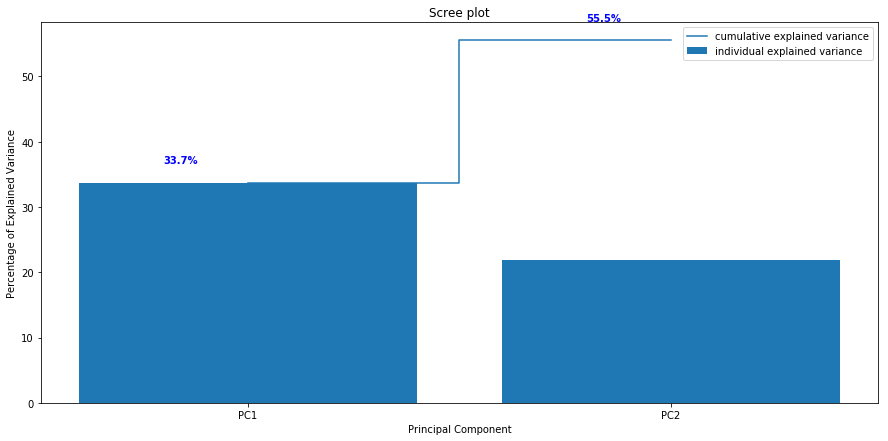

In [57]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(15, 7))
plt.bar(x = range(1, len(per_var)+1), height = per_var, tick_label = labels, label='individual explained variance')
plt.step(range(1, len(per_var)+1), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree plot')
plt.legend(loc='best')
for i, v in enumerate(cum_var_exp):
    plt.text(i + .80, v+3, str(v)+'%', color='blue', fontweight='bold')
plt.show()

In [58]:
pca_df = pd.DataFrame(pca_data, columns = labels)
pca_df.head()

,PC1,PC2
0,3.106143,-1.331391
1,-1.649517,2.072352
2,2.982040,-0.116277
3,3.520851,-1.358524
4,1.844132,2.185090


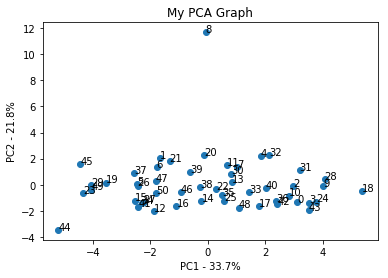

In [59]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [60]:
# PCA using NM2

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(NM2)
pca_data = pca.transform(NM2)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
cum_var_exp = np.round(np.cumsum(per_var), decimals = 1)

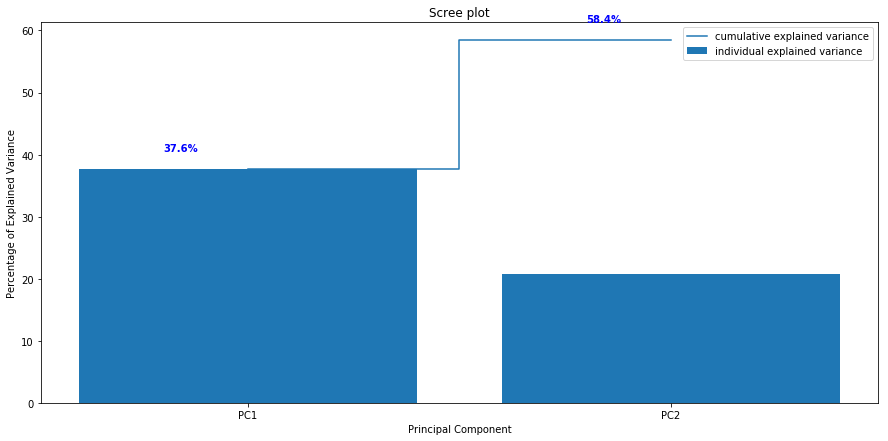

In [61]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(15, 7))
plt.bar(x = range(1, len(per_var)+1), height = per_var, tick_label = labels, label='individual explained variance')
plt.step(range(1, len(per_var)+1), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree plot')
plt.legend(loc='best')
for i, v in enumerate(cum_var_exp):
    plt.text(i + .80, v+3, str(v)+'%', color='blue', fontweight='bold')
plt.show()

In [62]:
pca_df = pd.DataFrame(pca_data, columns = labels)
pca_df.head()

,PC1,PC2
0,0.658362,-0.364388
1,-0.287350,0.231782
2,0.629149,0.138526
3,0.718556,-0.346918
4,0.425654,0.748626


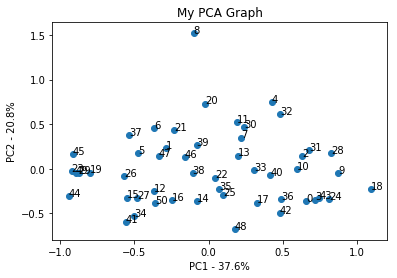

In [63]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

# PART - 2

In [64]:
# K-mean

from sklearn.cluster import KMeans

X1 = pca_df[['PC1' , 'PC2']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

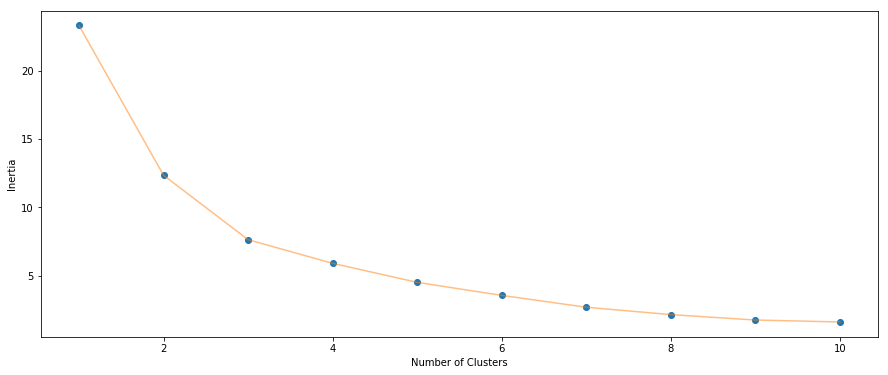

In [65]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [66]:
algorithm = (KMeans(n_clusters = 1 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

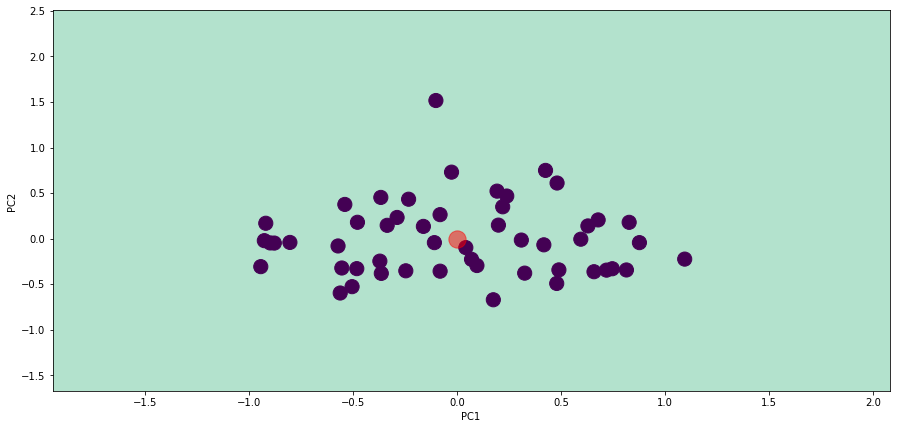

In [67]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'PC1' ,y = 'PC2' , data = pca_df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC2') , plt.xlabel('PC1')
plt.show()

In [68]:
import ipdb
def variance(datapoints,centroids,clusters, k):
    """
    Uses mean
    """
    #ipdb.set_trace()
    tss = 0
    mean = datapoints.mean()
    for i in (datapoints-mean):
        tss += sum([j**2 for j in i])
    # tss = sum([i**2] for i in [datapoints-mean])
    wcss = 0
    for index, center in enumerate(centroids):
        wcss += sum([i**2 for i in (clusters[index][0]-center)])
    bss = tss - wcss
    #print("mean:", mean.round(3))
    print("tss:", tss.round(3))
    print("wcss:", wcss.round(3))
    print("bss:", bss.round(3))

In [69]:
variance(X1, centroids1, X1, 1)

tss: 23.355
wcss: 0.867
bss: 22.488


In [70]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(X1, X1)

array([[0.        , 1.11794124, 0.50376192, ..., 0.57329283, 1.58684072,
        1.02167267],
       [1.11794124, 0.        , 0.92123188, ..., 1.01556331, 0.67057505,
        0.61902977],
       [0.50376192, 0.92123188, 0.        , ..., 0.92956171, 1.53720017,
        1.12080972],
       ...,
       [0.57329283, 1.01556331, 0.92956171, ..., 0.        , 1.24013301,
        0.61117003],
       [1.58684072, 0.67057505, 1.53720017, ..., 1.24013301, 0.        ,
        0.62963073],
       [1.02167267, 0.61902977, 1.12080972, ..., 0.61117003, 0.62963073,
        0.        ]])

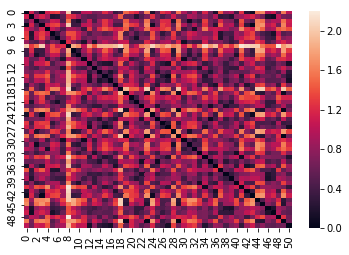

In [71]:
sns.heatmap(euclidean_distances(X1, X1))

In [72]:
algorithm = (KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

In [73]:
def clusters_get(q, p):
    a, b, c, d, clusters = [], [], [], [], []
    labels = list(q)
    datapoints = list(p)
    for i in range(len(labels)):
        if labels[i] == 0:
            a.append(datapoints[i])
        elif labels[i] == 1:
            b.append(datapoints[i])
        elif labels[i] == 2:
            c.append(datapoints[i])
        elif labels[i] == 3:
            d.append(datapoints[i])
    if len(a) > 0:
        clusters.append(a)
    if len(b) > 0:
        clusters.append(b)
    if len(c) > 0:
        clusters.append(c)
    if len(d) > 0:
        clusters.append(d)
    return clusters

In [75]:
clusters = clusters_get(labels2, X1)
#clusters

In [76]:
variance(X1, centroids1, clusters, 2)

tss: 23.355
wcss: 0.136
bss: 23.219


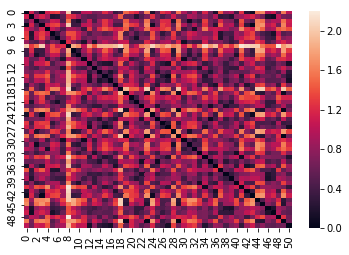

In [78]:
sns.heatmap(euclidean_distances(X1, X1))

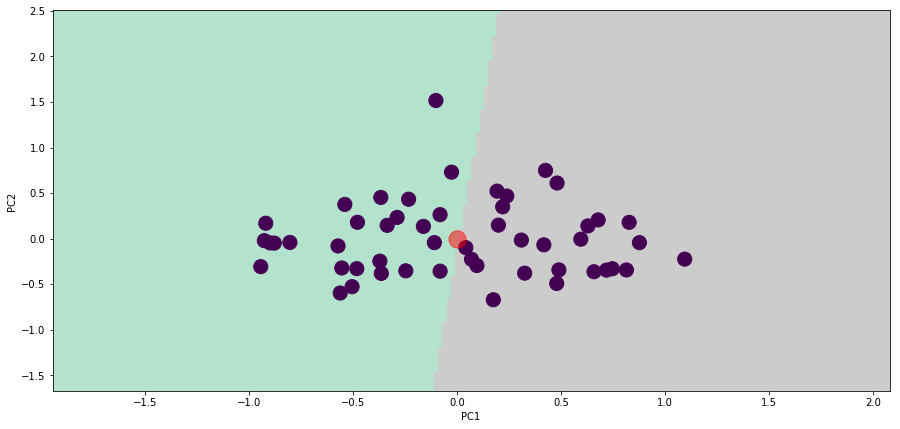

In [37]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'PC1' ,y = 'PC2' , data = pca_df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC2') , plt.xlabel('PC1')
plt.show()

In [38]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 



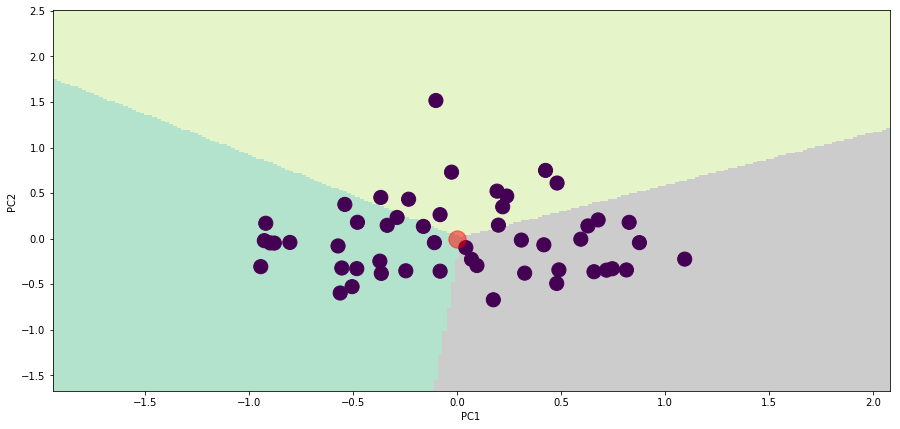

In [39]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'PC1' ,y = 'PC2' , data = pca_df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC2') , plt.xlabel('PC1')
plt.show()

In [47]:
clusters2 = clusters_get(labels2, X1)
variance(X1, centroids2, clusters2, 3)
#clusters2

tss: 23.355
wcss: 0.371
bss: 22.984


In [42]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

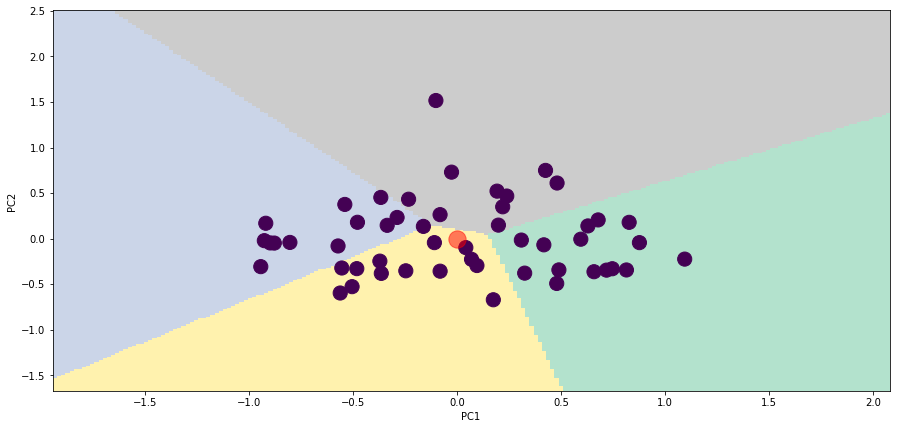

In [43]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'PC1' ,y = 'PC2' , data = pca_df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC2') , plt.xlabel('PC1')
plt.show()

In [44]:
clusters3 = clusters_get(labels3, X1)
variance(X1, centroids3, clusters3, 3)

tss: 23.355
wcss: 0.321
bss: 23.035


For n_clusters = 2 The average silhouette_score is : 0.40844157624470984
For n_clusters = 3 The average silhouette_score is : 0.41368932784720763
For n_clusters = 4 The average silhouette_score is : 0.38459455971028417
For n_clusters = 5 The average silhouette_score is : 0.38192472555174434
For n_clusters = 6 The average silhouette_score is : 0.420655963142685


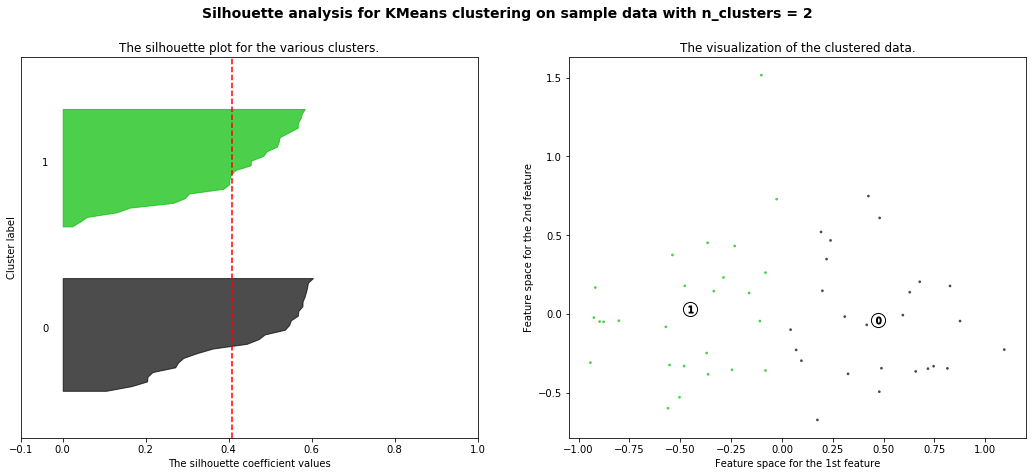

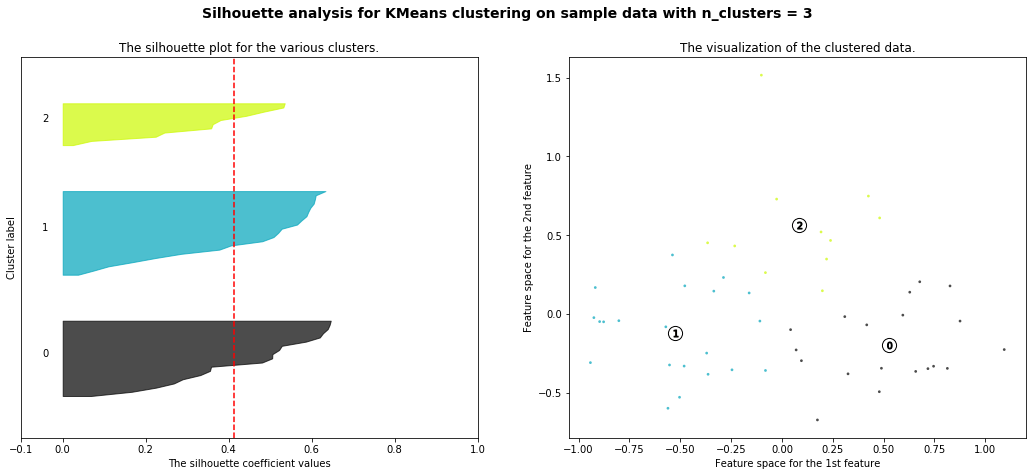

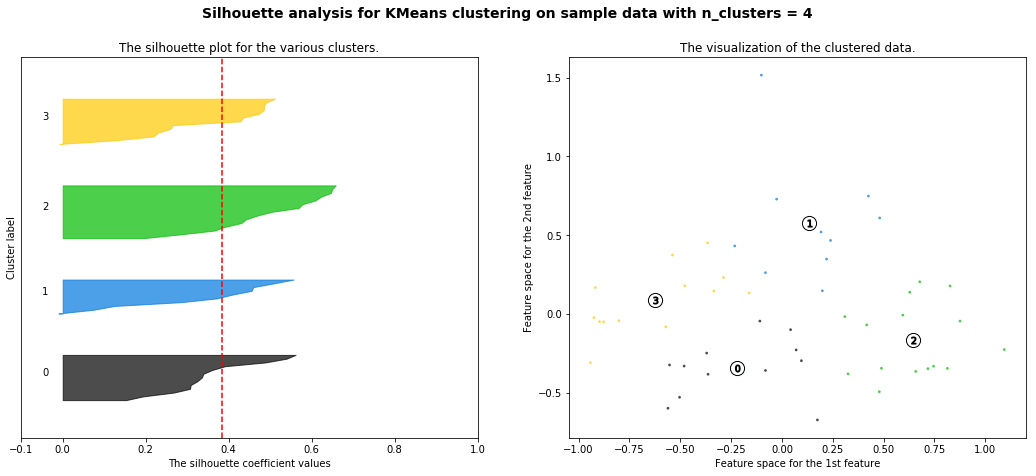

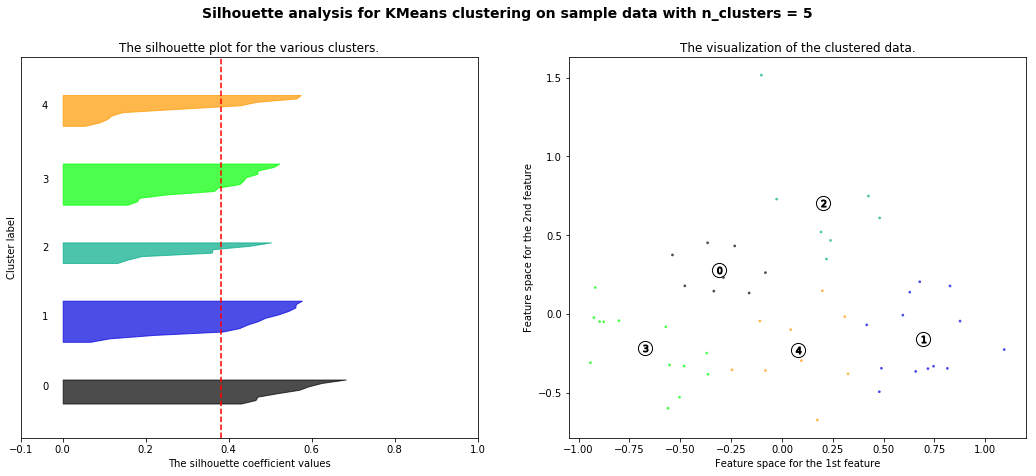

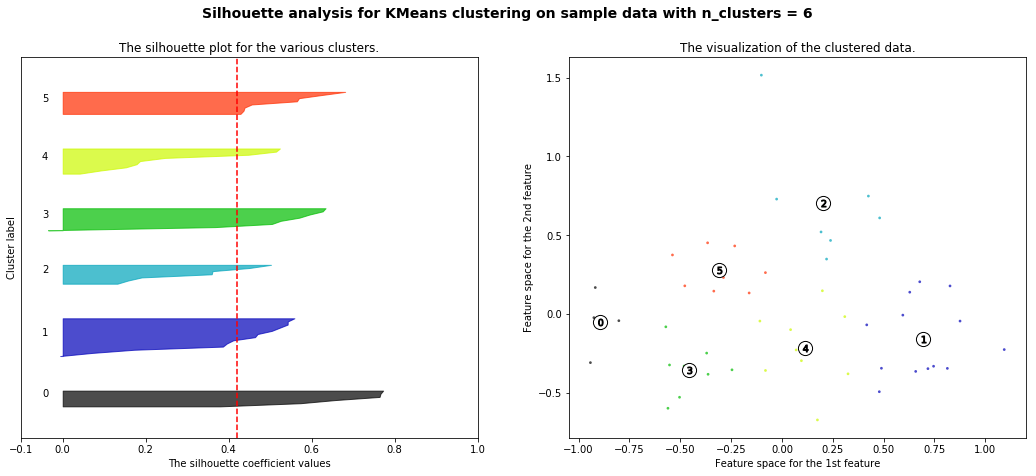

In [45]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X1, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X1[:, 0], X1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [46]:
# kMediods
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
sample = X1
# Set random initial medoids.
initial_medoids = [1, 10]
# Create instance of K-Medoids algorithm.
kmedoids_instance = kmedoids(sample, initial_medoids)
# Run cluster analysis and obtain results.
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
# Show allocated clusters.
print(clusters)
# Display clusters.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.show()

ModuleNotFoundError: No module named 'pyclustering'

In [48]:
# Bisecting K-mean 

from sklearn.cluster import KMeans

X1 = pca_df[['PC1' , 'PC2']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='random', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

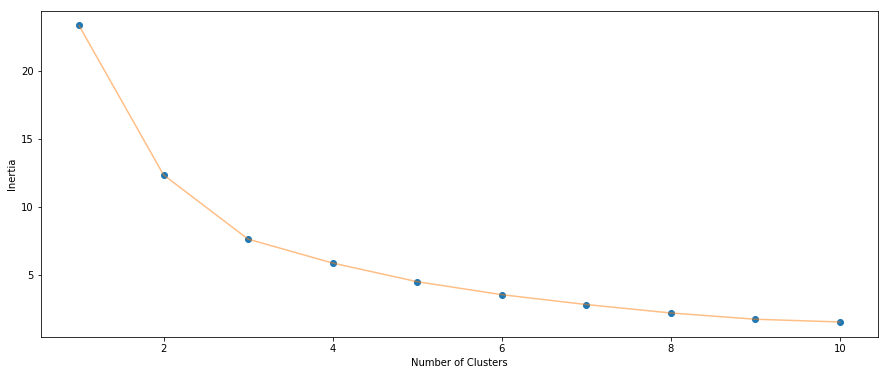

In [49]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [52]:
algorithm = (KMeans(n_clusters = 1 ,init='random', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels11 = algorithm.labels_
centroids11 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

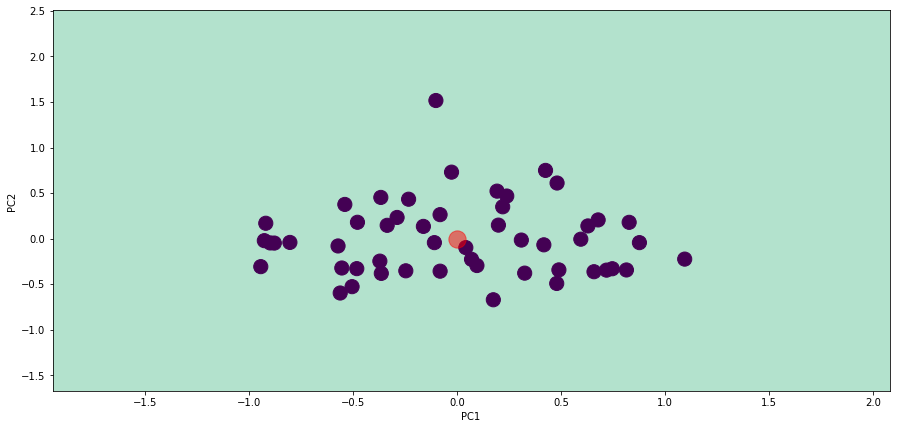

In [53]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'PC1' ,y = 'PC2' , data = pca_df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC2') , plt.xlabel('PC1')
plt.show()

In [67]:
clusters11 = clusters_get(labels11, X1)
variance(X1, centroids11, clusters11, 1)

tss: 23.355
wcss: 0.566
bss: 22.789


In [59]:
algorithm = (KMeans(n_clusters = 2 ,init='random', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

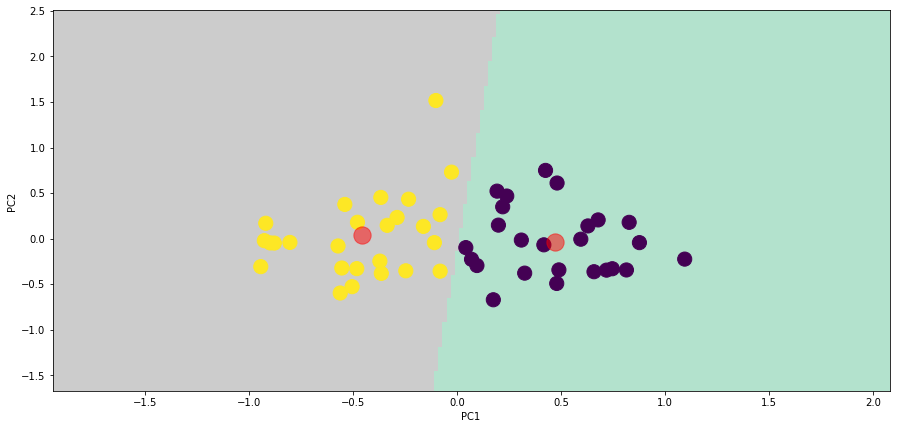

In [60]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'PC1' ,y = 'PC2' , data = pca_df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC2') , plt.xlabel('PC1')
plt.show()

In [61]:
clusters = clusters_get(labels1, X1)
variance(X1, centroids1, clusters, 2)

tss: 23.355
wcss: 0.209
bss: 23.146


In [62]:
algorithm = (KMeans(n_clusters = 3 ,init='random', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

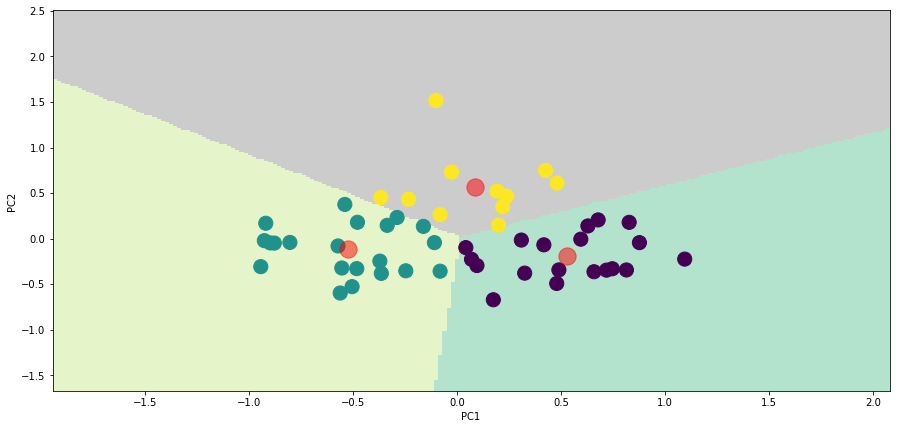

In [63]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'PC1' ,y = 'PC2' , data = pca_df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC2') , plt.xlabel('PC1')
plt.show()

In [64]:
clusters = clusters_get(labels1, X1)
variance(X1, centroids1, clusters, 3)

tss: 23.355
wcss: 0.371
bss: 22.984


In [65]:
algorithm = (KMeans(n_clusters = 4 ,init='random', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

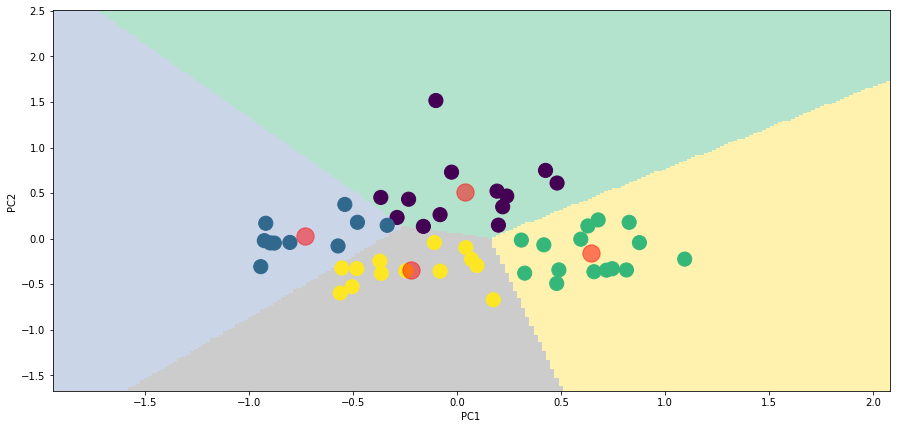

In [66]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'PC1' ,y = 'PC2' , data = pca_df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC2') , plt.xlabel('PC1')
plt.show()

In [68]:
clusters = clusters_get(labels1, X1)
variance(X1, centroids1, clusters, 4)

tss: 23.355
wcss: 0.339
bss: 23.016


For n_clusters = 2 The average silhouette_score is : 0.40844157624470984
For n_clusters = 3 The average silhouette_score is : 0.41368932784720763
For n_clusters = 4 The average silhouette_score is : 0.38459455971028417
For n_clusters = 5 The average silhouette_score is : 0.38192472555174434
For n_clusters = 6 The average silhouette_score is : 0.420655963142685


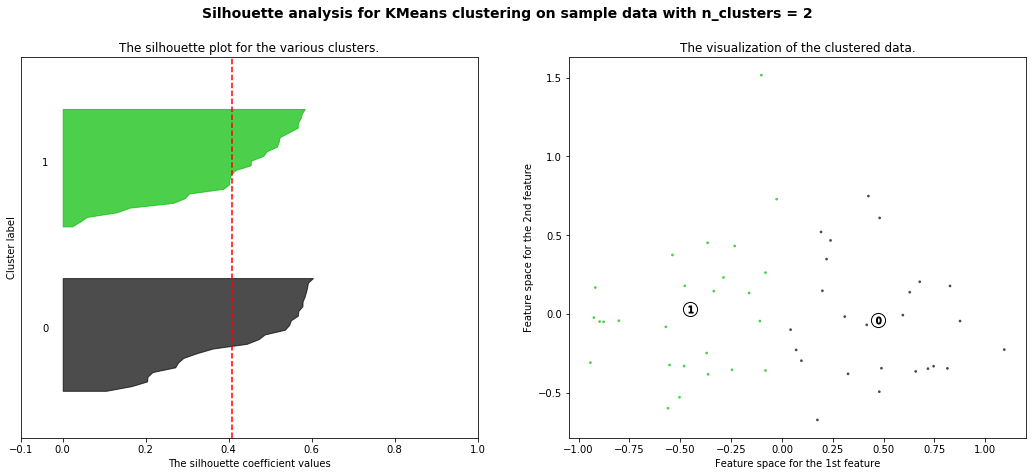

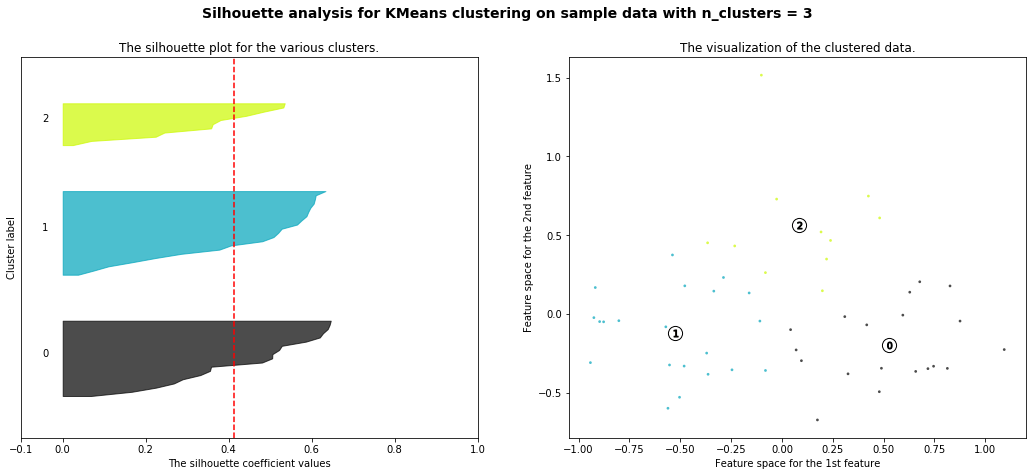

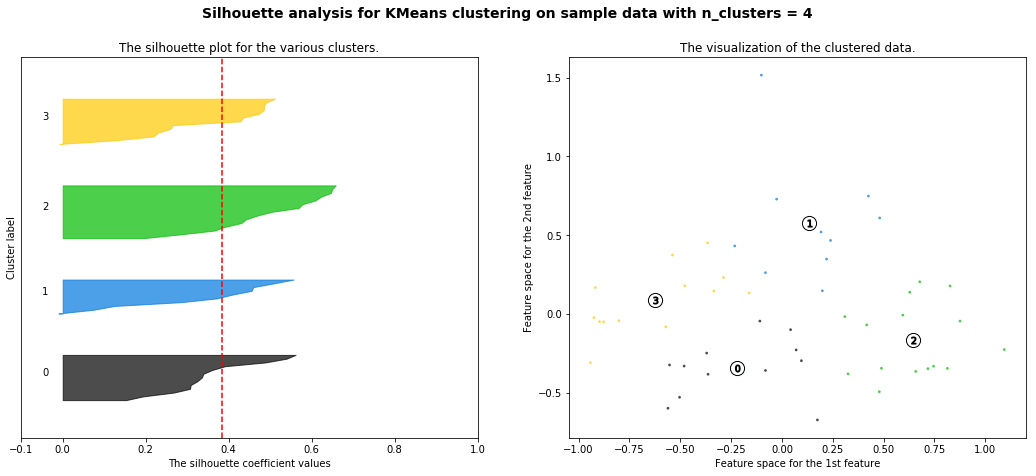

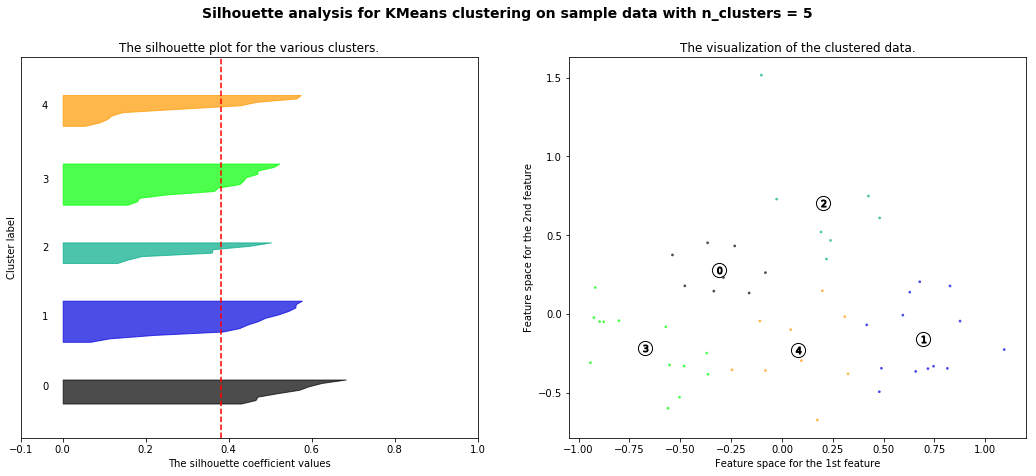

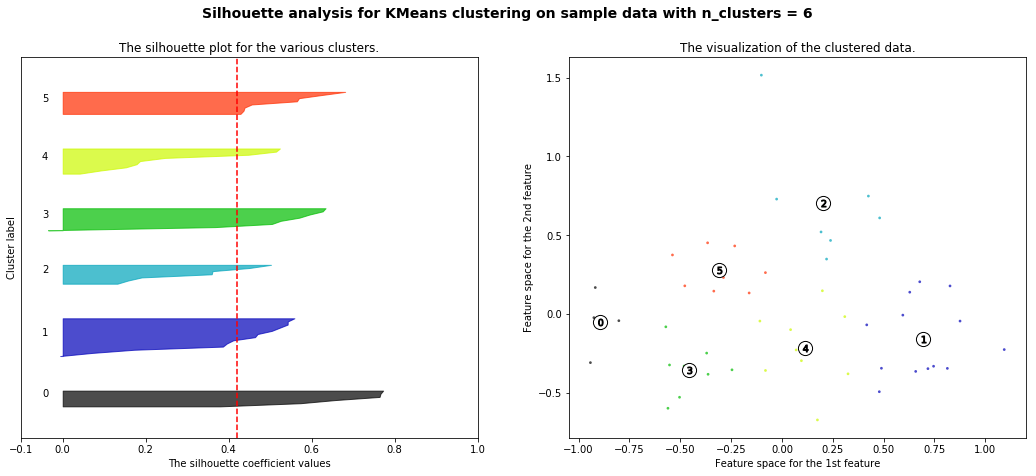

In [69]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X1, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X1[:, 0], X1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

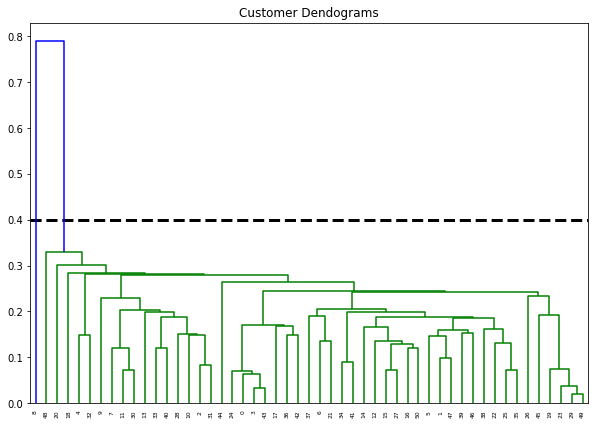

In [70]:
# Single Link

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
plt.hlines(y=.4,xmin=0,xmax=2000,lw=3,linestyles='--')
dend = shc.dendrogram(shc.linkage(X1, method='single'))

In [71]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
cluster.fit_predict(pca_df)

ValueError: Unknown linkage type single.Valid options are dict_keys(['ward', 'complete', 'average'])

In [72]:
plt.scatter(X1[:,0],X1[:,1], c=cluster.labels_, cmap='rainbow')

AttributeError: 'AgglomerativeClustering' object has no attribute 'labels_'

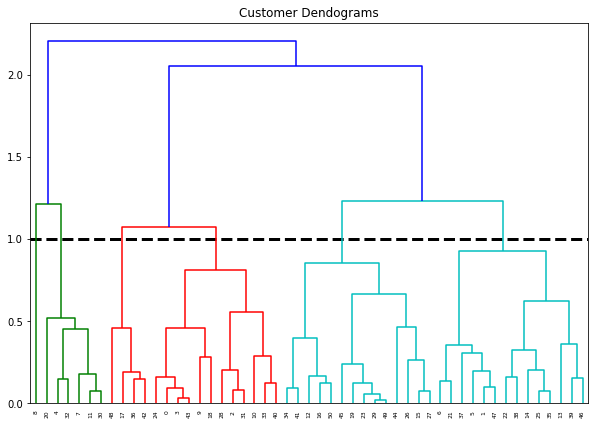

In [74]:
# Complete link

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
plt.hlines(y=1.0,xmin=0,xmax=2000,lw=3,linestyles='--')
dend = shc.dendrogram(shc.linkage(X1, method='complete'))

In [75]:

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')  
cluster.fit_predict(pca_df) 



array([0, 1, 0, 0, 2, 1, 1, 2, 4, 0, 0, 2, 3, 1, 1, 3, 3, 0, 0, 3, 2, 1,
       1, 3, 0, 1, 3, 3, 0, 3, 2, 0, 2, 0, 3, 1, 0, 1, 1, 1, 0, 3, 0, 0,
       3, 3, 1, 1, 0, 3, 3])

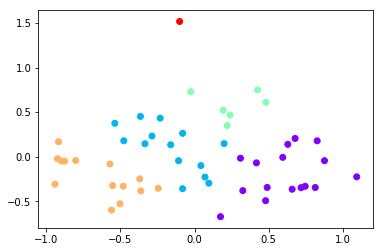

In [76]:
plt.scatter(X1[:,0],X1[:,1], c=cluster.labels_, cmap='rainbow')

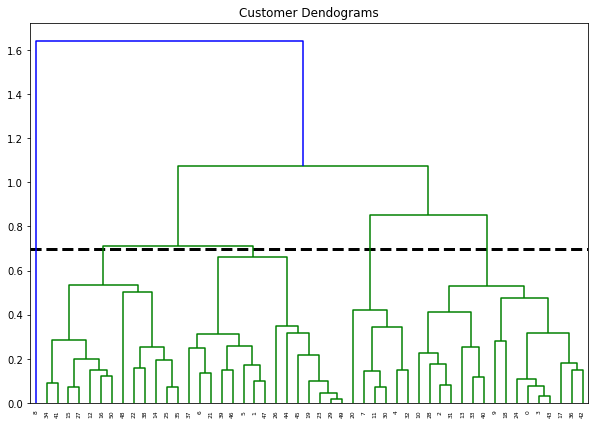

In [77]:
# Average Link


plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
plt.hlines(y=0.7,xmin=0,xmax=2000,lw=3,linestyles='--')
dend = shc.dendrogram(shc.linkage(X1, method='average'))

In [78]:

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')  
cluster.fit_predict(pca_df) 



array([2, 0, 2, 2, 1, 0, 0, 1, 3, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0])

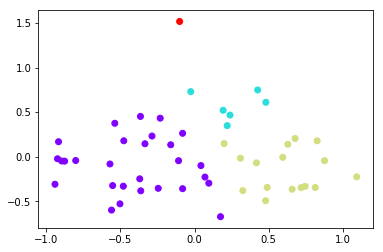

In [79]:
plt.scatter(X1[:,0],X1[:,1], c=cluster.labels_, cmap='rainbow')

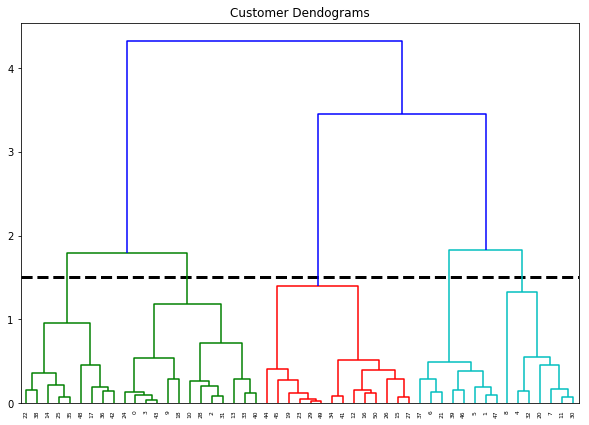

In [80]:
# Ward Method

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
plt.hlines(y=1.5,xmin=0,xmax=2000,lw=3,linestyles='--')
dend = shc.dendrogram(shc.linkage(X1, method='ward'))

In [81]:

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(pca_df) 



array([2, 3, 2, 2, 1, 3, 3, 1, 1, 2, 2, 1, 0, 2, 4, 0, 0, 4, 2, 0, 1, 3,
       4, 0, 2, 4, 0, 0, 2, 0, 1, 2, 1, 2, 0, 4, 4, 3, 4, 3, 2, 0, 4, 2,
       0, 0, 3, 3, 4, 0, 0])

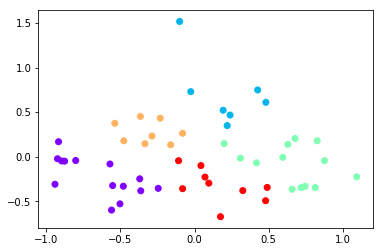

In [82]:
plt.scatter(X1[:,0],X1[:,1], c=cluster.labels_, cmap='rainbow')

In [83]:
# DENSITY-BASED CLUSTERING ALGORITHMS

from sklearn import cluster

dbs = cluster.DBSCAN(eps=0.1,  min_samples=2)
clusters = dbs.fit_predict(X1)

Text(0, 0.5, 'Feature 1')

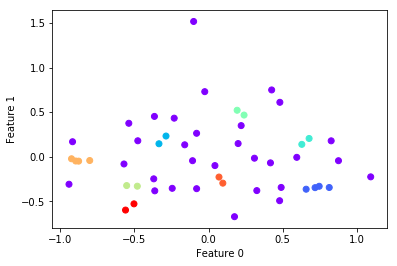

In [84]:
plt.scatter(X1[:, 0], X1[:, 1], c=clusters, cmap="rainbow")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [85]:
dbs = cluster.DBSCAN(eps=0.15,  min_samples=2)
clusters = dbs.fit_predict(X1)

Text(0, 0.5, 'Feature 1')

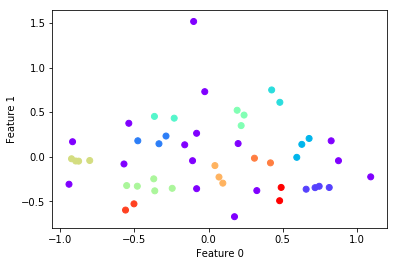

In [86]:
plt.scatter(X1[:, 0], X1[:, 1], c=clusters, cmap="rainbow")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [87]:
dbs = cluster.DBSCAN(eps=0.2,  min_samples=2)
clusters = dbs.fit_predict(X1)

Text(0, 0.5, 'Feature 1')

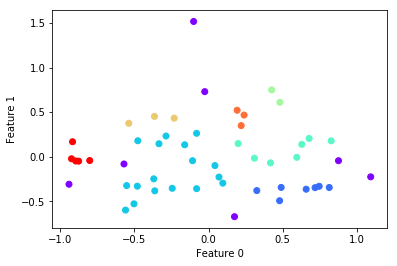

In [88]:
plt.scatter(X1[:, 0], X1[:, 1], c=clusters, cmap="rainbow")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [89]:
dbs = cluster.DBSCAN(eps=0.25,  min_samples=3)
clusters = dbs.fit_predict(X1)

Text(0, 0.5, 'Feature 1')

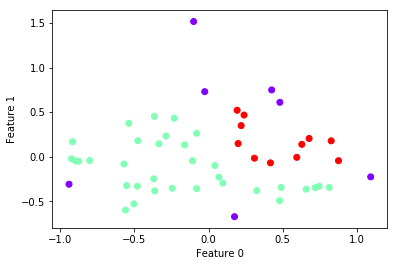

In [90]:
plt.scatter(X1[:, 0], X1[:, 1], c=clusters, cmap="rainbow")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [91]:
dbs = cluster.DBSCAN(eps=0.25,  min_samples=4)
clusters = dbs.fit_predict(X1)

Text(0, 0.5, 'Feature 1')

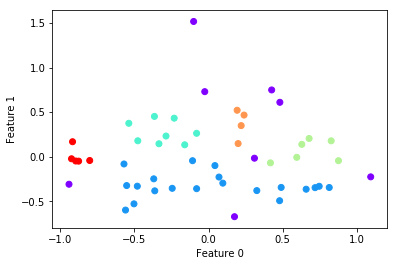

In [92]:
plt.scatter(X1[:, 0], X1[:, 1], c=clusters, cmap="rainbow")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")